In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importando os dados

In [2]:
df = pd.read_csv('./adult.csv', sep=',').replace('?', np.nan)
df['income'] = df['income'].apply(lambda x : 0 if x == '<=50K' else 1)
print(f'Número de amostras: {df.shape[0]}\nNúmero de colunas: {df.shape[1]}')
df.head()

Número de amostras: 32561
Número de colunas: 15


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [3]:
# detecetando valores faltantes
missing_values = df[df.isnull().any(axis=1)]
print(f'Número de fileiras com células vazias: {missing_values.shape[0]}')
print('Número de células vazias por coluna')
print(df.isnull().sum())

# removendo colunas vazias
df = df.dropna()

Número de fileiras com células vazias: 2399
Número de células vazias por coluna
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


## Análises iniciais

In [4]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238,0.248922
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984,0.432396
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
str_col_list = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for col in str_col_list:
    print(f'Quantidade de valores únicos na coluna {col}: {len(df[col].unique())}')

Quantidade de valores únicos na coluna workclass: 7
Quantidade de valores únicos na coluna education: 16
Quantidade de valores únicos na coluna marital.status: 7
Quantidade de valores únicos na coluna occupation: 14
Quantidade de valores únicos na coluna relationship: 6
Quantidade de valores únicos na coluna race: 5
Quantidade de valores únicos na coluna sex: 2
Quantidade de valores únicos na coluna native.country: 41


In [7]:
feature_map = {}
for col in str_col_list:
    feature_map[col] = {unique: i for i, unique in enumerate(list(df[col].unique()))}
    df[col] = df[col].map(feature_map[col])

In [8]:
feature_map

{'workclass': {'Private': 0,
  'State-gov': 1,
  'Federal-gov': 2,
  'Self-emp-not-inc': 3,
  'Self-emp-inc': 4,
  'Local-gov': 5,
  'Without-pay': 6},
 'education': {'HS-grad': 0,
  '7th-8th': 1,
  'Some-college': 2,
  '10th': 3,
  'Doctorate': 4,
  'Prof-school': 5,
  'Bachelors': 6,
  'Masters': 7,
  '11th': 8,
  'Assoc-voc': 9,
  '1st-4th': 10,
  '5th-6th': 11,
  'Assoc-acdm': 12,
  '12th': 13,
  '9th': 14,
  'Preschool': 15},
 'marital.status': {'Widowed': 0,
  'Divorced': 1,
  'Separated': 2,
  'Never-married': 3,
  'Married-civ-spouse': 4,
  'Married-spouse-absent': 5,
  'Married-AF-spouse': 6},
 'occupation': {'Exec-managerial': 0,
  'Machine-op-inspct': 1,
  'Prof-specialty': 2,
  'Other-service': 3,
  'Adm-clerical': 4,
  'Transport-moving': 5,
  'Sales': 6,
  'Craft-repair': 7,
  'Farming-fishing': 8,
  'Tech-support': 9,
  'Protective-serv': 10,
  'Handlers-cleaners': 11,
  'Armed-Forces': 12,
  'Priv-house-serv': 13},
 'relationship': {'Not-in-family': 0,
  'Unmarried': 1,

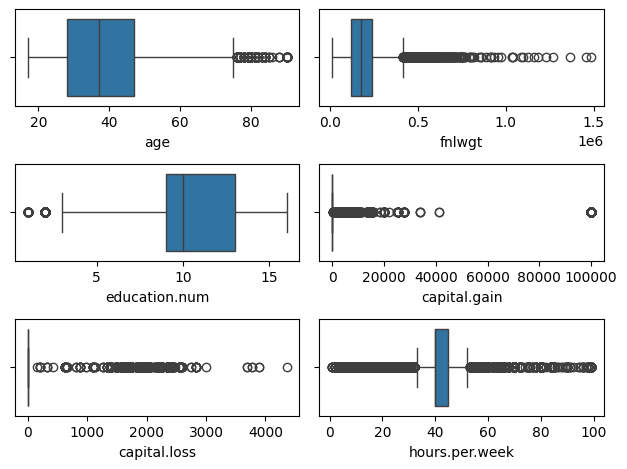

In [9]:
fig, axes = plt.subplots(3,2)

col_list = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
for i, col in enumerate(col_list):
    # gerando boxplot
    sns.boxplot(data=df.loc[:,col], orient='h', ax=axes.flatten()[i])

plt.tight_layout()
plt.show()

In [10]:
# número de amostras por classe
print(df.groupby('income').size())

income
0    22654
1     7508
dtype: int64


<Axes: >

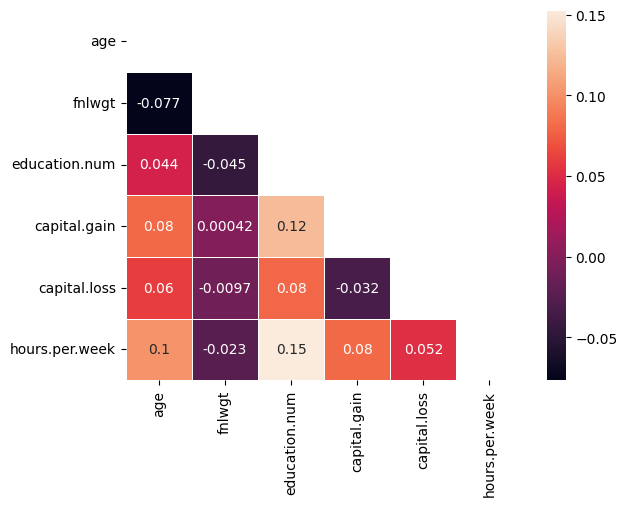

In [11]:
# calculando a correlação
corr = df[col_list].corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) # para deixar somente o triângulo abaixo da identidade
sns.heatmap(corr, mask=mask, linewidth=.5, annot=True)

Podemos ver que os dados são desbalanceados

Acabei removendo as colunas com valores vazios, mas aceito feedbacks sobre

# Treinando os modelos

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Random Forest

In [13]:
# dividindo em treino e teste
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# usar stratify por conta de dataset desbalanceado
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [14]:
clf = RandomForestClassifier().fit(X_train, y_train)

In [15]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division = 0)) # hmmmm isso aqui tá ruim dms

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4531
           1       0.76      0.62      0.68      1502

    accuracy                           0.86      6033
   macro avg       0.82      0.78      0.80      6033
weighted avg       0.85      0.86      0.85      6033



<Axes: >

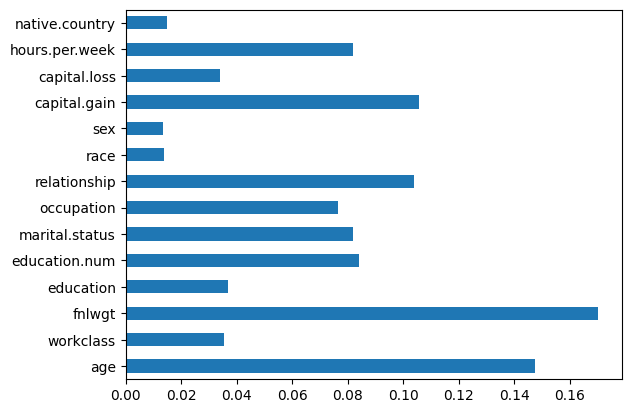

In [16]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

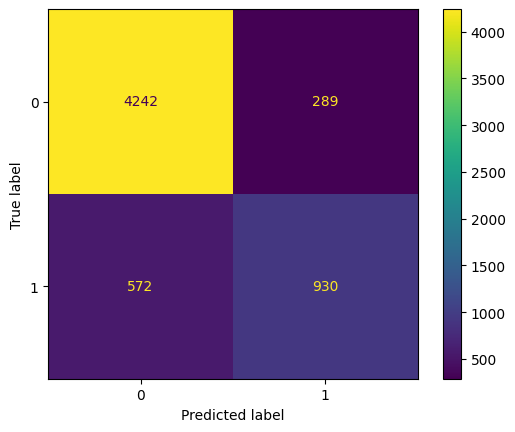

In [17]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

## Decision Tree

In [18]:
clf = DecisionTreeClassifier().fit(X_train, y_train)

In [19]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division = 0)) # isso aqui também

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4531
           1       0.61      0.62      0.61      1502

    accuracy                           0.81      6033
   macro avg       0.74      0.74      0.74      6033
weighted avg       0.81      0.81      0.81      6033



<Axes: >

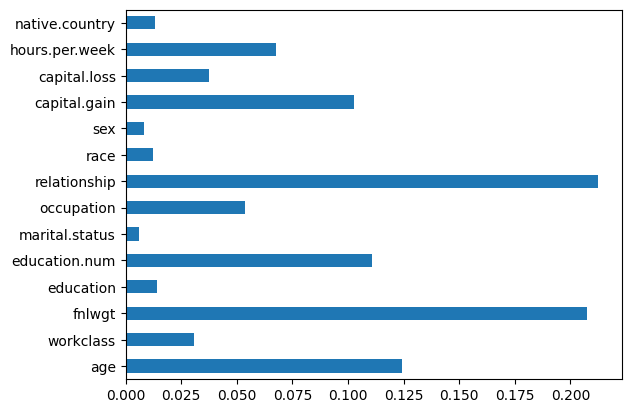

In [20]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

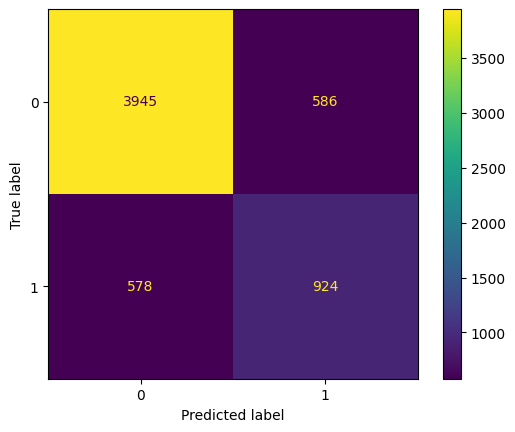

In [21]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

# PCA

In [23]:
# standartizando
X = StandardScaler().fit_transform(df.iloc[:,:-1])
y = df.iloc[:,-1]

In [24]:
pca = PCA(n_components=0.85)
X = pca.fit_transform(X)

In [25]:
# usar stratify por conta de dataset desbalanceado
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

## Random Forest

In [26]:
clf = RandomForestClassifier().fit(X_train, y_train)

In [27]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division = 0)) # hmmmm isso aqui tá ruim dms

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4531
           1       0.71      0.57      0.63      1502

    accuracy                           0.83      6033
   macro avg       0.79      0.75      0.76      6033
weighted avg       0.83      0.83      0.83      6033



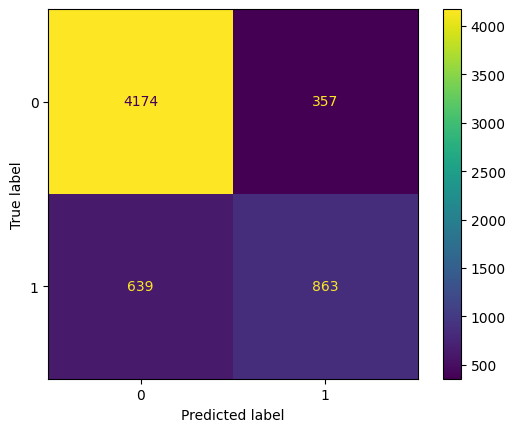

In [30]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

## Decision Tree

In [31]:
clf = DecisionTreeClassifier().fit(X_train, y_train)

In [32]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division = 0)) # isso aqui também

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4531
           1       0.57      0.59      0.58      1502

    accuracy                           0.79      6033
   macro avg       0.72      0.72      0.72      6033
weighted avg       0.79      0.79      0.79      6033



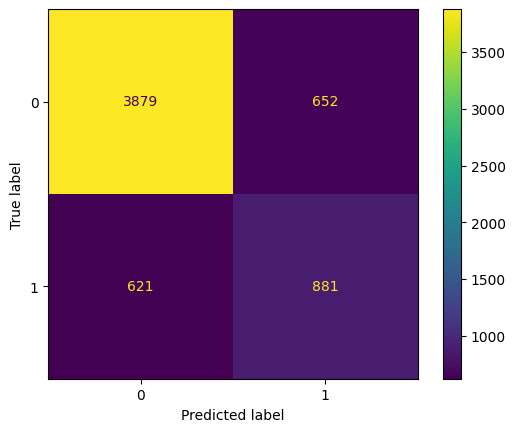

In [35]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()